In [1]:
# Importing required Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white')

### Load data 

In [2]:
# Read data
train =  pd.read_csv("loan_train.csv")

In [3]:
train.shape

(614, 13)

In [4]:
# Features in the dataset
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### Understand data 

In [5]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
# Print data types for each variable
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [8]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## Univariate Analysis

### Univariate Analysis for Categorical Variables 

In [9]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [10]:
# Normalize can be set to True to print proportions instead of number 
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

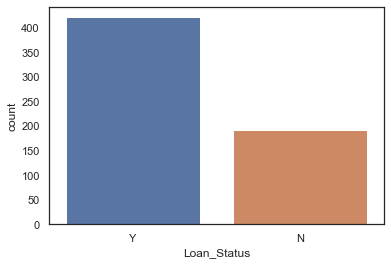

In [11]:
# Bar graph for loan_status
sns.countplot(x="Loan_Status", data=train)

In [12]:
train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [13]:
# count number of null values 
train['Gender'].isnull().sum()

13

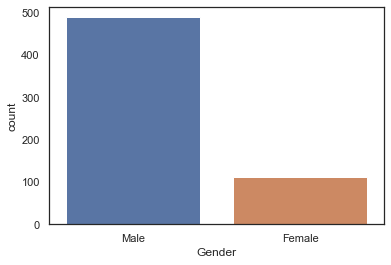

In [14]:
# Bar Graph for Gender
sns.countplot(x="Gender",data=train)

In [15]:
train['Dependents'].value_counts(normalize=True)

0     0.575960
1     0.170284
2     0.168614
3+    0.085142
Name: Dependents, dtype: float64

In [16]:
train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

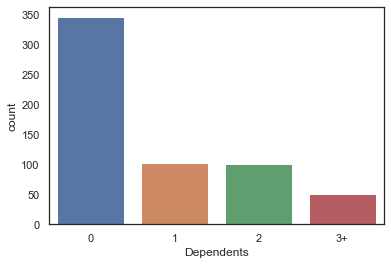

In [17]:
# Bar graph for dependents 
sns.countplot(x="Dependents", data=train)

In [18]:
train['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

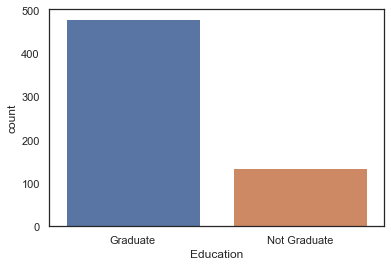

In [19]:
sns.countplot("Education", data=train)

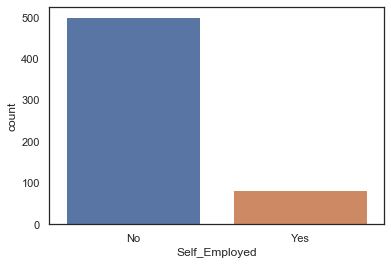

In [20]:
# Bar graph of Self_Employed
sns.countplot("Self_Employed",data=train)

In [21]:
train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

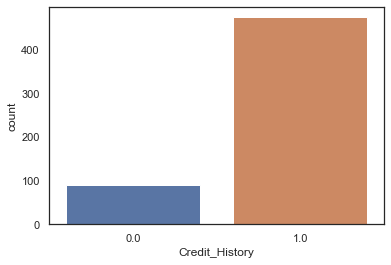

In [22]:
# Bar graph of Credit_History
sns.countplot(x='Credit_History',data=train)

In [23]:
train['Credit_History'].value_counts(normalize=True)

1.0    0.842199
0.0    0.157801
Name: Credit_History, dtype: float64

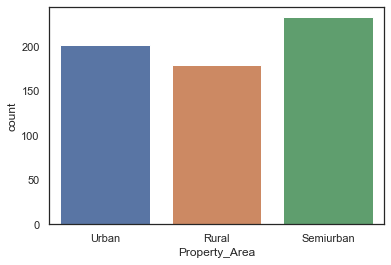

In [24]:
# Bar graph of Property_Area
sns.countplot(x='Property_Area',data=train)

In [25]:
train['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

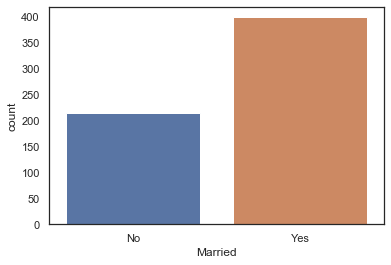

In [26]:
# Bar Graph for Married
sns.countplot(x="Married",data=train)

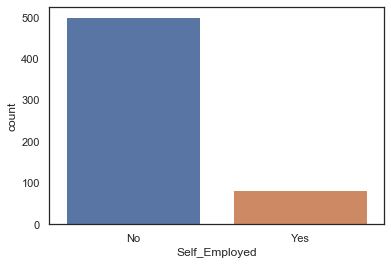

In [27]:
# Bar Graph for Self_Employed
sns.countplot(x="Self_Employed",data=train)

In [28]:
print(train['Self_Employed'].isnull().sum())   # Missing count 
print(train['Gender'].isnull().sum())   # Missing count 
print(train['Married'].isnull().sum())   # Missing count 
print(train['Credit_History'].isnull().sum())   # Missing count 
print(train['Dependents'].isnull().sum())   # Missing count 
print(train['Property_Area'].isnull().sum())   # Missing count 
print(train['Education'].isnull().sum())   # Missing count 

32
13
3
50
15
0
0


###  Univariate Analysis for Continous Variables 

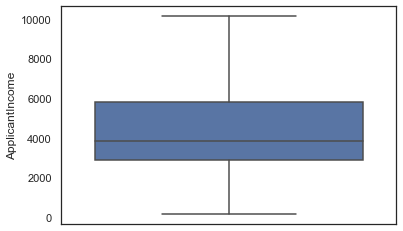

In [29]:
# Visualizing numerical features
#plt.gcf().set_size_inches(5,8)
sns.boxplot(x="ApplicantIncome",data=train, orient='vertical', showfliers=False)

#### display how many outliers in ApplicantIncome 

In [30]:
app_income = train["ApplicantIncome"]

In [31]:
q1,q2,q3 = app_income.quantile([0.25,0.5,0.75])
print(q1,q2,q3)

2877.5 3812.5 5795.0


In [32]:
iqr = q3 - q1

In [33]:
iqr

2917.5

In [34]:
print("Higher outliers : ", (app_income > (q3 + 1.5 * iqr)).sum())
print("Lower  outliers : ", (app_income < (q1 - 1.5 * iqr)).sum())

Higher outliers :  50
Lower  outliers :  0


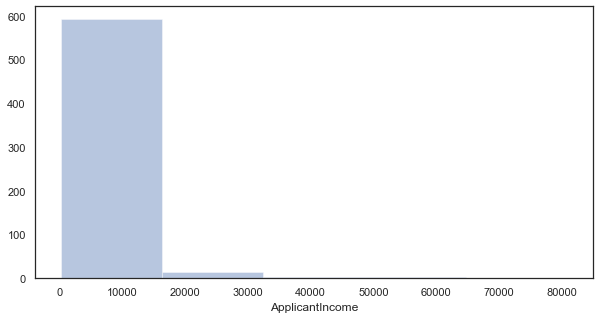

In [35]:
sns.distplot(train["ApplicantIncome"],bins=5,kde=False) 
plt.gcf().set_size_inches(10,5)

Text(0.5, 1.0, 'Applicant Income By Education')

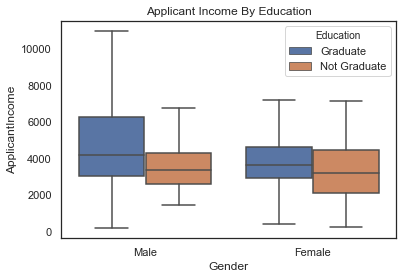

In [36]:
sns.boxplot(x="Gender",y='ApplicantIncome', hue="Education", data=train, showfliers=False)
plt.title("Applicant Income By Education")
# plt.suptitle("")  # Suppress default title

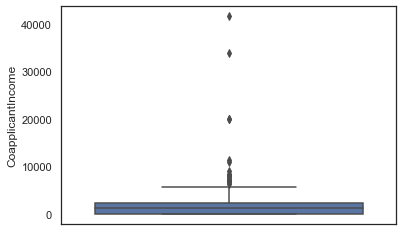

In [37]:
sns.boxplot(x="CoapplicantIncome",data=train, orient='vertical', showfliers=True)

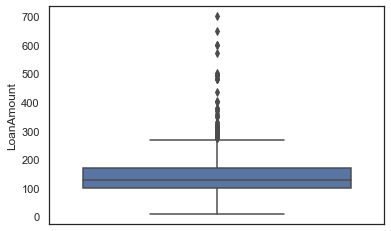

In [38]:
sns.boxplot(train["LoanAmount"], orient='vertical', showfliers = True)
#plt.gcf().set_size_inches(20,8)

e:\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
e:\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


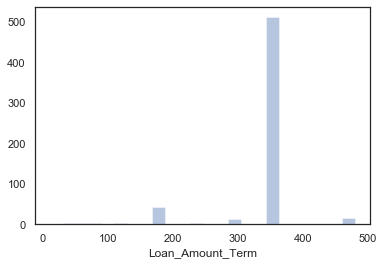

In [39]:
sns.distplot(train["Loan_Amount_Term"], kde=False)

##  Bivariate Ananlysis

In [40]:
train.pivot_table(index='Property_Area',columns="Loan_Status", values='Loan_ID',aggfunc=len)

Loan_Status,N,Y
Property_Area,,
Rural,69,110
Semiurban,54,179
Urban,69,133


In [41]:
train.groupby(['Gender','Education'])['ApplicantIncome'].mean()

Gender  Education   
Female  Graduate        4646.467391
        Not Graduate    4629.700000
Male    Graduate        5992.345745
        Not Graduate    3630.061947
Name: ApplicantIncome, dtype: float64

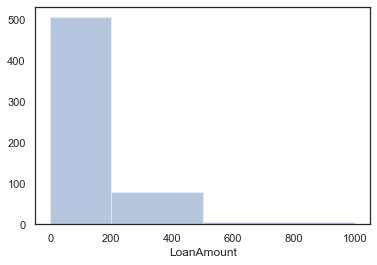

In [42]:
sns.distplot(train['LoanAmount'], bins=[0,200,500,1000], kde=False)

In [43]:
d = train.groupby(by=["Loan_Status","Married"], as_index=False)['Loan_ID'].count()
# d.rename(columns={'Loan_ID':'Count'}, inplace=True)
print(d)
# sns.catplot(x="Loan_Status",y="Loan_ID", hue="Gender",col="Married", data=d, kind="bar")

  Loan_Status Married  Loan_ID
0           N      No       79
1           N     Yes      113
2           Y      No      134
3           Y     Yes      285


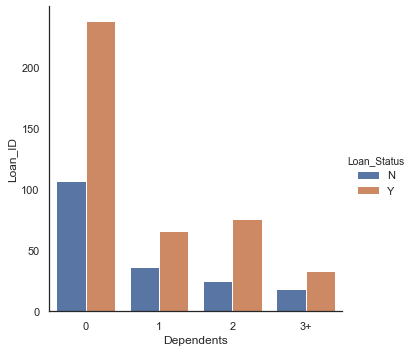

In [44]:
d = train.groupby(by=["Loan_Status","Dependents"], as_index=False)['Loan_ID'].count()
sns.catplot(x="Dependents",y="Loan_ID", hue="Loan_Status", data=d, kind="bar")

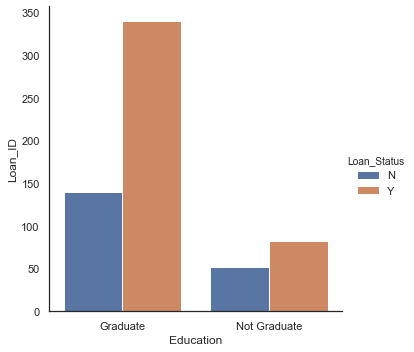

In [45]:
d = train.groupby(by=["Loan_Status","Education"], as_index=False)['Loan_ID'].count()
sns.catplot(x="Education",y="Loan_ID", hue="Loan_Status", data=d, kind="bar")

  Loan_Status Self_Employed  Loan_ID
0           N            No      157
1           N           Yes       26
2           Y            No      343
3           Y           Yes       56


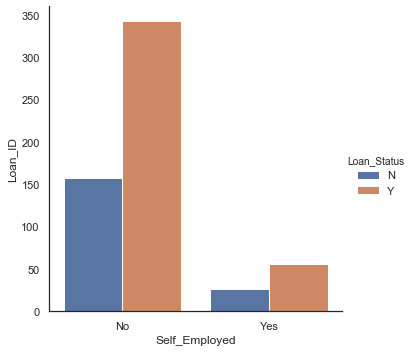

In [46]:
d = train.groupby(by=["Loan_Status","Self_Employed"], as_index=False)['Loan_ID'].count()
print(d)
sns.catplot(x="Self_Employed",y="Loan_ID", hue="Loan_Status", data=d, kind="bar")

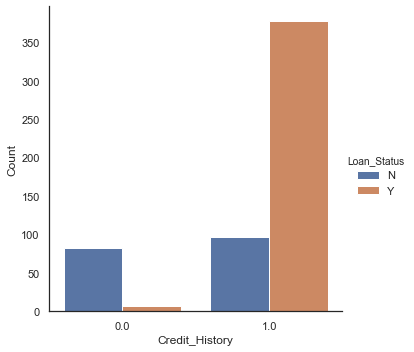

In [47]:
d = train.groupby(by=["Loan_Status","Credit_History"], as_index=False)['Loan_ID'].count()
d.rename(columns={'Loan_ID':'Count'}, inplace=True)
sns.catplot(x="Credit_History",y="Count", hue="Loan_Status", data=d, kind="bar")

  Loan_Status Property_Area  Count
0           N         Rural     69
1           N     Semiurban     54
2           N         Urban     69
3           Y         Rural    110
4           Y     Semiurban    179
5           Y         Urban    133


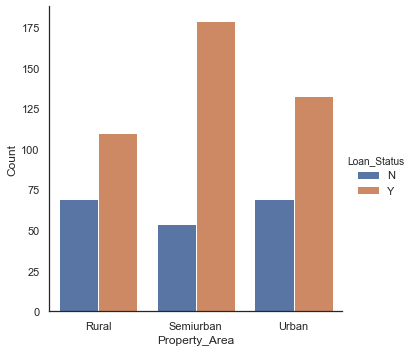

In [48]:
d = train.groupby(by=["Loan_Status","Property_Area"], as_index=False)['Loan_ID'].count()
d.rename(columns={'Loan_ID':'Count'}, inplace=True)
print(d)
sns.catplot(x="Property_Area",y="Count", hue="Loan_Status", data=d, kind="bar")

In [49]:
# Making bins for Applicant income variable
bins=[0,2500,4000,6000,85000]
group=['Low','Average','High', 'Very high']
# Create a new column for income bin  
train['Income_Bin']= pd.cut(train['ApplicantIncome'],bins,labels=group)

In [50]:
train[['ApplicantIncome','Income_Bin']]

,ApplicantIncome,Income_Bin
0,5849,High
1,4583,High
2,3000,Average
3,2583,Average
4,6000,High
5,5417,High
6,2333,Low
7,3036,Average
8,4006,High
9,12841,Very high


  Loan_Status Income_Bin  Count
0           N        Low     34
1           N    Average     67
2           N       High     45
3           N  Very high     46
4           Y        Low     74
5           Y    Average    159
6           Y       High     98
7           Y  Very high     91


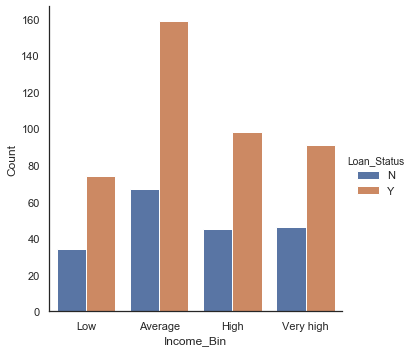

In [51]:
d = train.groupby(by=["Loan_Status","Income_Bin"], as_index=False)['Loan_ID'].count()
d.rename(columns={'Loan_ID':'Count'}, inplace=True)
print(d)
sns.catplot(x="Income_Bin",y="Count", hue="Loan_Status", data=d, kind="bar")

In [52]:
# Making bins for Coapplicant income variable
bins=[-1,1000,3000,42000]
group=['Low','Average','High']
train['Coapplicant_Income_Bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)

  Loan_Status Coapplicant_Income_Bin  Count
0           N                    Low     99
1           N                Average     61
2           N                   High     32
3           Y                    Low    196
4           Y                Average    161
5           Y                   High     65


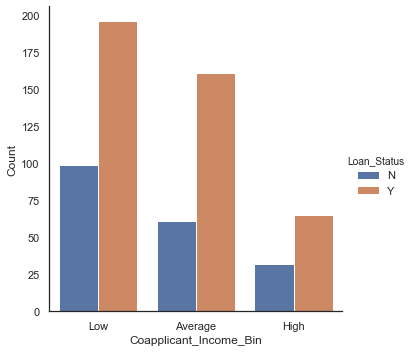

In [53]:
d = train.groupby(by=["Loan_Status","Coapplicant_Income_Bin"], as_index=False)['Loan_ID'].count()
d.rename(columns={'Loan_ID':'Count'}, inplace=True)
print(d)
sns.catplot(x="Coapplicant_Income_Bin",y="Count", hue="Loan_Status", data=d, kind="bar")

In [54]:
# Making bins for LoanAmount variable
bins=[0,100,200,700]
group=['Low','Average','High']
train['LoanAmount_Bin']=pd.cut(train['LoanAmount'],bins,labels=group)
train[['LoanAmount','LoanAmount_Bin']]

,LoanAmount,LoanAmount_Bin
0,NaN,NaN
1,128.0,Average
2,66.0,Low
3,120.0,Average
4,141.0,Average
5,267.0,High
6,95.0,Low
7,158.0,Average
8,168.0,Average
9,349.0,High


  Loan_Status LoanAmount_Bin  Count
0           N            Low     47
1           N        Average    103
2           N           High     31
3           Y            Low    107
4           Y        Average    255
5           Y           High     49


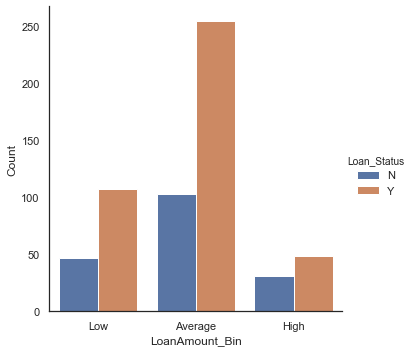

In [55]:
d = train.groupby(by=["Loan_Status","LoanAmount_Bin"], as_index=False)['Loan_ID'].count()
d.rename(columns={'Loan_ID':'Count'}, inplace=True)
print(d)
sns.catplot(x="LoanAmount_Bin",y="Count", hue="Loan_Status", data=d, kind="bar")

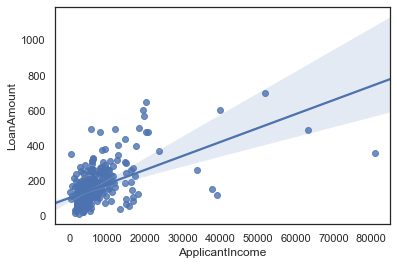

In [56]:
sns.regplot(x="ApplicantIncome", y = "LoanAmount", data = train)

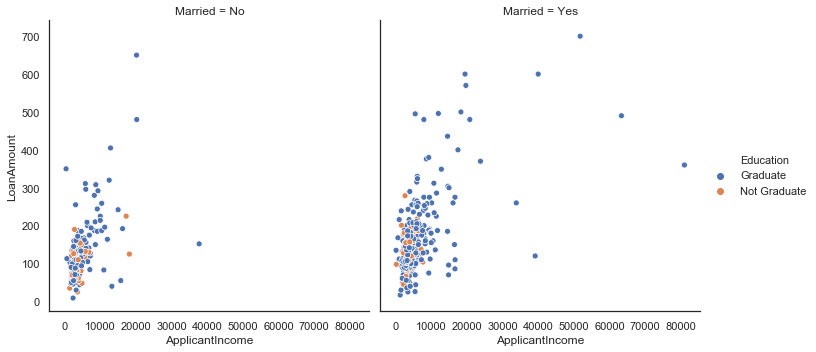

In [57]:
sns.relplot(x="ApplicantIncome", y = "LoanAmount", data = train, hue="Education", col="Married")

## Data Wrangling 

In [58]:
# Drop the new variable of bins
train=train.drop(['Income_Bin', 'Coapplicant_Income_Bin', 'LoanAmount_Bin'], axis=1)

#### Dependents 

In [59]:
train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [60]:
# Convert Dependents to str 
train['Dependents'] = train["Dependents"].astype('str')

In [61]:
# replacing 3+ in Dependents variable with 3
train['Dependents'].replace(to_replace = ['0', '1', '2', '3+'], value=['0', '1','2', '3'],inplace=True)

#### Loan_Status

In [62]:
# replacing Y and N in Loan_Status variable with 1 and 0 respectively
train['Loan_Status'].replace(to_replace =['N','Y'], value=[0,1],inplace=True)

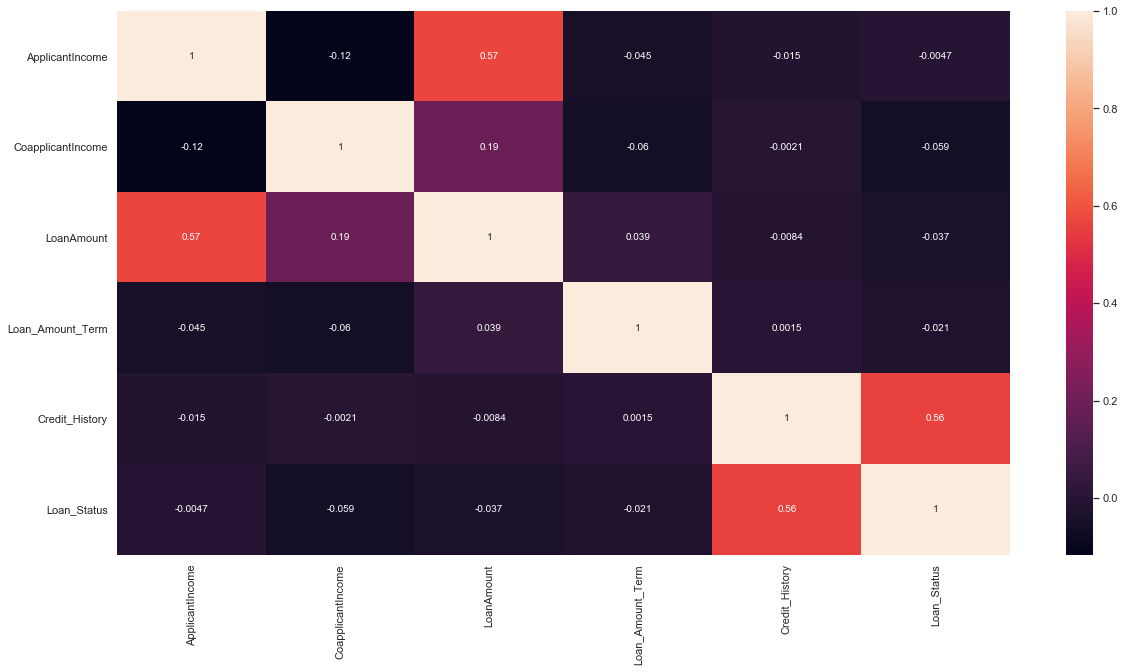

In [63]:
# Print correlation matrix to understand relationship between variables
matrix = train.corr()
sns.heatmap(matrix, annot=True)
plt.gcf().set_size_inches(20,10)

### Missing value and outlier treatment

In [64]:
# Checking the missing values
s = train.isnull().sum()
s [ s > 0]

Gender              13
Married              3
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
dtype: int64

In [65]:
# replacing the missing values with the mode
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)

In [66]:
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [67]:
dmode = train['Dependents'].mode()[0]

In [68]:
train.loc[train['Dependents'] == 'nan','Dependents'] = dmode

In [69]:
(train['Dependents'] == 'nan').isnull().sum()

0

In [70]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [71]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [72]:
train['LoanAmount'].mean(), train['LoanAmount'].median()

(146.41216216216216, 128.0)

In [73]:
# Replace missing values
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [74]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

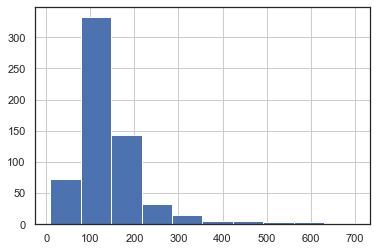

In [75]:
train['LoanAmount'].hist(bins=10)

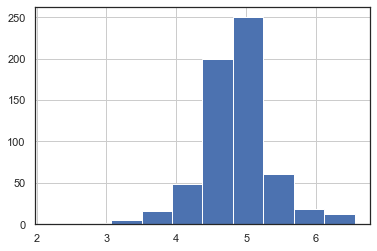

In [76]:
# Removing skewness in LoanAmount variable by log transformation
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=10)

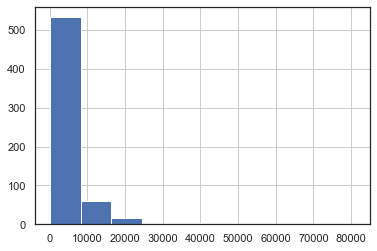

In [77]:
train['ApplicantIncome'].hist(bins=10)

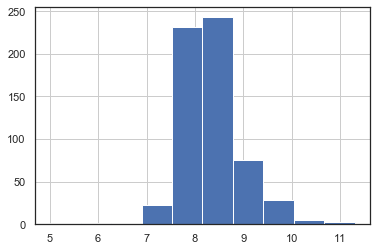

In [78]:
# Removing skewness in ApplicantIncome variable by log transformation
train['ApplicantIncome_log'] = np.log(train['ApplicantIncome'])
train['ApplicantIncome_log'].hist(bins=10)

In [79]:
# Drop loan_ID column 
train=train.drop('Loan_ID',axis=1)

In [80]:
y = train.Loan_Status
X = train.drop('Loan_Status',axis=1)

In [81]:
X.drop(['LoanAmount','ApplicantIncome','CoapplicantIncome'],axis=1, inplace=True)

In [82]:
X.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'LoanAmount_log',
       'ApplicantIncome_log'],
      dtype='object')

In [83]:
# Adding dummies to the dataset
X=pd.get_dummies(X)

In [84]:
X.columns

Index(['Loan_Amount_Term', 'Credit_History', 'LoanAmount_log',
       'ApplicantIncome_log', 'Gender_Female', 'Gender_Male', 'Married_No',
       'Married_Yes', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3', 'Education_Graduate', 'Education_Not Graduate',
       'Self_Employed_No', 'Self_Employed_Yes', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

In [85]:
X.shape

(614, 19)

In [86]:
!!cd

['E:\\classroom\\ds\\aug16\\loan']

In [87]:
# Save dataframe
train.to_csv("final_train.csv",index=False)

## Build Model using Logistic Regression

In [88]:
# Importing packages for cross validation and logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

### Split data into train and test data 

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [90]:
X_train.shape, X_test.shape

((491, 19), (123, 19))

In [91]:
# logistic regression   
model = LogisticRegression()
model.fit(X_train,y_train)

e:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [92]:
y_pred = model.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('Accuracy_score :',score)   

Accuracy_score : 0.8292682926829268


### Display confusion matrix

In [93]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[14, 19],
       [ 2, 88]], dtype=int64)

In [201]:
(cm[0,0] + cm[1,1]) / 123

0.8292682926829268

### Display classification report

In [94]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.82      0.98      0.89        90

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123



In [78]:
train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_log'],
      dtype='object')

### Feature Engineering

In [42]:
train = pd.read_csv("final_train.csv")

In [43]:
# Total_Income feature
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']

d:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


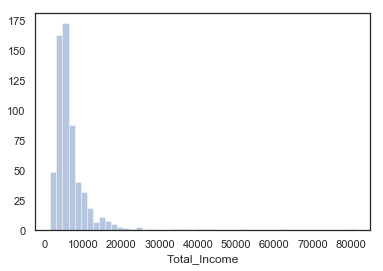

In [33]:
sns.distplot(train['Total_Income'],kde=False)

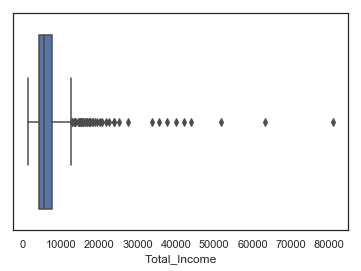

In [34]:
sns.boxplot(train['Total_Income'])

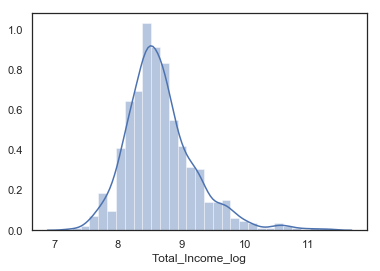

In [44]:
train['Total_Income_log'] = np.log(train['Total_Income'])
sns.distplot(train['Total_Income_log']);

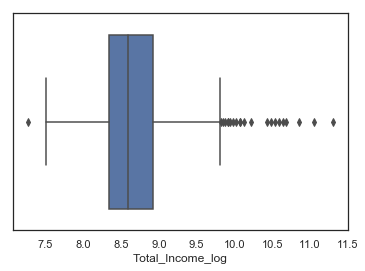

In [36]:
sns.boxplot(train['Total_Income_log'])

In [45]:
# EMI feature
train['EMI']=(train['LoanAmount']/train['Loan_Amount_Term'])*1000

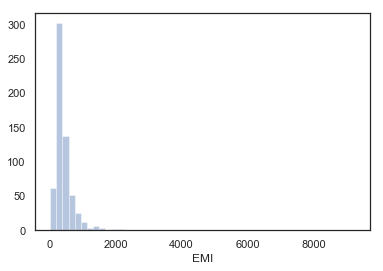

In [38]:
sns.distplot(train['EMI'],kde=False)

In [46]:
# Balance Income feature
train['Balance_Income']=train['Total_Income']-(train['EMI']) 

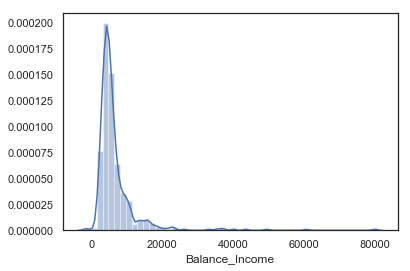

In [40]:
sns.distplot(train['Balance_Income']);

## Decision Tree

In [95]:
from sklearn.tree import DecisionTreeClassifier

In [96]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [97]:
y_pred = model.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('accuracy_score',score)   

accuracy_score 0.6747967479674797


In [98]:
confusion_matrix(y_test, y_pred)

array([[21, 12],
       [28, 62]], dtype=int64)

In [101]:
from sklearn.metrics import precision_score

In [102]:
precision_score(y_test,y_pred)

0.8378378378378378

In [99]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.43      0.64      0.51        33
           1       0.84      0.69      0.76        90

    accuracy                           0.67       123
   macro avg       0.63      0.66      0.63       123
weighted avg       0.73      0.67      0.69       123



### Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

d:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [66]:
y_pred = model.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('accuracy_score',score)   

accuracy_score 0.9935064935064936


## Naive Bayes 

In [104]:
from sklearn.naive_bayes import GaussianNB

In [105]:
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [106]:
y_pred = model.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('accuracy_score',score)   

accuracy_score 0.8292682926829268


In [107]:
confusion_matrix(y_test, y_pred)

array([[14, 19],
       [ 2, 88]], dtype=int64)

In [108]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.82      0.98      0.89        90

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123



## Support Vector Machines

In [109]:
from sklearn.svm import SVC

In [110]:
model = SVC()
model.fit(X_train,y_train)

e:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [111]:
y_pred = model.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('accuracy_score',score)   

accuracy_score 0.8130081300813008


In [112]:
confusion_matrix(y_test, y_pred)


array([[12, 21],
       [ 2, 88]], dtype=int64)

In [222]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        46
          1       0.70      1.00      0.82       108

avg / total       0.49      0.70      0.58       154



C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Check cross validation scores with different algorithms 

In [22]:
train = pd.read_csv("final_train.csv")
train_o = pd.read_csv("loan_train.csv")
y = train_o.Loan_Status

In [23]:
train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_log'],
      dtype='object')

In [24]:
train =pd.get_dummies(train)

In [25]:
train.shape

(614, 19)

In [26]:
train.columns

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'LoanAmount_log',
       'Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 19 columns):
Dependents                 614 non-null int64
ApplicantIncome            614 non-null int64
CoapplicantIncome          614 non-null float64
LoanAmount                 614 non-null float64
Loan_Amount_Term           614 non-null float64
Credit_History             614 non-null float64
Loan_Status                614 non-null int64
LoanAmount_log             614 non-null float64
Gender_Female              614 non-null uint8
Gender_Male                614 non-null uint8
Married_No                 614 non-null uint8
Married_Yes                614 non-null uint8
Education_Graduate         614 non-null uint8
Education_Not Graduate     614 non-null uint8
Self_Employed_No           614 non-null uint8
Self_Employed_Yes          614 non-null uint8
Property_Area_Rural        614 non-null uint8
Property_Area_Semiurban    614 non-null uint8
Property_Area_Urban        614 non-null uint8
dtypes: flo

In [30]:
X = train
X.shape

(614, 19)

In [28]:
y.shape

(614,)

In [29]:
from sklearn.model_selection import cross_val_score
all_scores = {}

In [31]:
clf = LogisticRegression(random_state=1)
scores = cross_val_score(clf,X, y,cv=5)
print(scores)
print('The accuracy of LogisticRegression is %.2f%%' % (scores.mean()*100))
all_scores['LogisticRegression'] = ( scores.mean() * 100)

d:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[1. 1. 1. 1. 1.]
The accuration of LogisticRegression is 100.00%


d:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [33]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
scores = cross_val_score(clf,X, y,cv=5)
print(scores)
print('The accuration of GaussianNB is %.2f%%' % (scores.mean()*100))
all_scores['GaussianNB'] = scores.mean() * 100

[1.         0.98387097 0.99180328 0.98360656 1.        ]
The accuration of GaussianNB is 99.19%


In [34]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
scores = cross_val_score(clf,X, y,cv=5)
print(scores)
print('The accuration of DecisionTreeClassifier is %.2f%%' % (scores.mean()*100))
all_scores['DecisionTreeClassifier'] = scores.mean() * 100

[1. 1. 1. 1. 1.]
The accuration of DecisionTreeClassifier is 100.00%


In [35]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier( n_estimators=10)
scores = cross_val_score(clf,X, y,cv=5)
print('The accuration of RandomForestClassifier is %.2f%%' % (scores.mean()*100))
all_scores['RandomForestClassifier'] = scores.mean() * 100

The accuration of RandomForestClassifier is 99.84%


[Text(0, 0, 'LogisticRegression'),
 Text(0, 0, 'GaussianNB'),
 Text(0, 0, 'DecisionTreeClassifier'),
 Text(0, 0, 'RandomForestClassifier')]

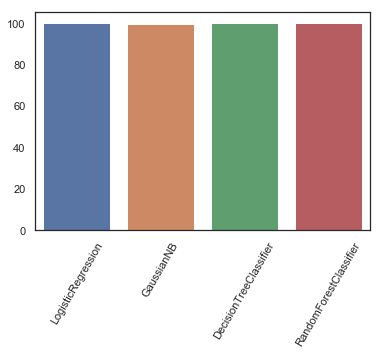

In [36]:
all_scores.keys()
all_scores.values()
plt = sns.barplot(x = list(all_scores.keys()), y = list(all_scores.values()))
plt.set_xticklabels(labels = all_scores.keys(),rotation=60)

### Logestic Regression with built-in Cross Validation

In [193]:
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(cv=5, random_state=0).fit(X_train, y_train)

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [195]:
y_pred = clf.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('Accuracy_score : ',score)   

Accuracy_score :  0.8051948051948052
